Text(0, 0.5, 'malic_acid')

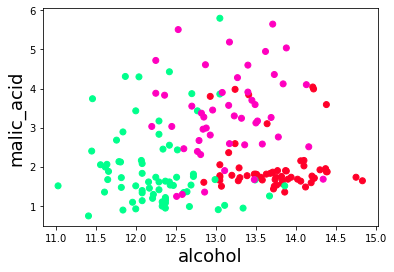

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

wine=load_wine()   #loading iris dataset from sklearn.datasets
x=wine.data

df=pd.DataFrame(data=wine.data, columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])


plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=wine.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('alcohol', fontsize=18)
plt.ylabel('malic_acid', fontsize=18)

In [2]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=13)
y = optics.fit_predict(x)

print("Cluster Labels")
print(optics.labels_)

Cluster Labels
[ 0  0 -1 -1 -1 -1  4  4  0  0 -1  4  4  0 -1  4  4  0 -1 -1 -1 -1  0  0
 -1 -1 -1  4 -1  0  4 -1  0  4  0 -1 -1  0  0 -1 -1  0  0  1 -1  0  0  0
  0  4  0  4 -1  4  0  0  0  4  4  2  1  2 -1 -1 -1  1  2  2 -1 -1 -1  3
  2  0 -1  3  3  2 -1  2 -1 -1 -1  2  2  2  2 -1  1 -1  2  2  2 -1 -1 -1
 -1  3  1  3  1 -1 -1  3  1 -1  2  2 -1  1 -1 -1 -1  3  3  3  2 -1 -1 -1
 -1  3 -1  3  3  3 -1  2 -1 -1 -1 -1 -1 -1  1  1  1  2 -1 -1 -1 -1  2 -1
 -1 -1  3 -1  1 -1 -1  2  3  1  1 -1  2 -1  1 -1  2  1 -1  1 -1  2  1  1
 -1 -1  2  2  1 -1 -1 -1 -1 -1]


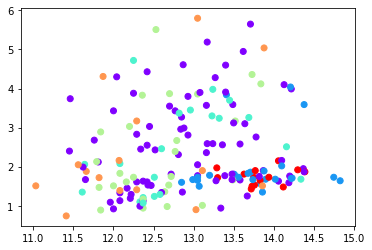

In [3]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=optics.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()

Text(0.5, 1.0, 'Predicted')

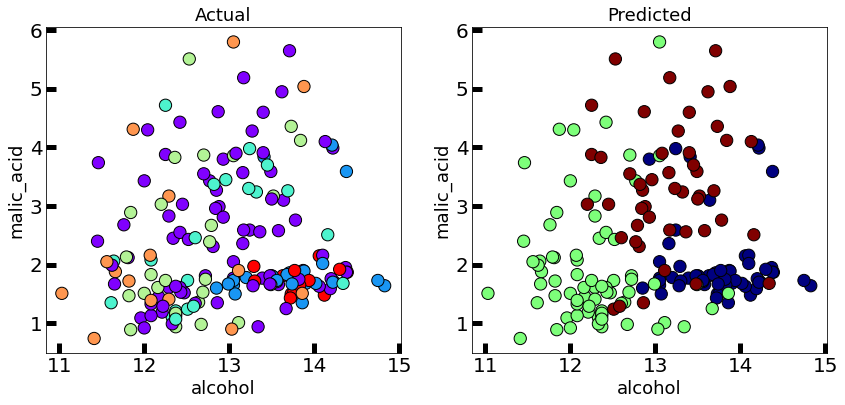

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['alcohol'], y=df['malic_acid'], c=y, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['alcohol'], y=df['malic_acid'], c=wine.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('alcohol', fontsize=18)
axes[0].set_ylabel('malic_acid', fontsize=18)
axes[1].set_xlabel('alcohol', fontsize=18)
axes[1].set_ylabel('malic_acid', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [5]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, optics.labels_)

The silhouette score is :


0.08708464008252535

In [6]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, optics.labels_)

The calinski harabasz score is :


44.955612959266325

In [7]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, optics.labels_)

The davies bouldin score is :


2.275571431762288